# Linear Regression with Closed-Form Solution

Author: Xavier Eugenio Asuncion

Date: February 27, 2024

## Description

This notebook demonstrates the implementation of a linear regression model using the closed-form solution. Linear regression is a classical machine learning algorithm used for modeling the relationship between a dependent variable and one or more independent variables. The closed-form solution provides an analytical way to find the optimal parameters for the model without iterative optimization methods.

## Description


## Key Components

1. **LinearRegressionClosedForm:** This class provides a convenient implementation of linear regression using the closed-form solution. It includes methods for fitting the model to training data, making predictions, evaluating model performance, and visualizing predictions.

2. **Training the Model:** The `fit` method fits the linear regression model to the training data using the closed-form solution.

3. **Prediction:** The `predict` method makes predictions using the trained model.

4. **Evaluation:** The `evaluate` method evaluates the model on test data using a specified loss function.

5. **Visualization:** The `visualize_predictions` method visualizes actual vs. predicted values for test data, aiding in model assessment.

### Dependencies

- Python 3.x
- Torch
- Torchvision
- Matplotlib
- Numpy

In [1]:
# uncomment this cell code if torch and torchvision are not installed in the system
# !pip3 install torch torchvision > /dev/null

## Theory

In linear regression, the goal is to minimize the mean squared error (MSE) loss function:

$$L(\theta) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \theta^T x_i)^2 $$

where:
- $ \theta $ is the vector of parameters (including the intercept and slope).
- $ x_i $ is the feature vector for the $i$-th sample.
- $ y_i $ is the target value for the $i$-th sample.
- $ n $ is the number of samples.

We want to find the parameter vector $ \theta $ that minimizes this loss function. To do so, we take the derivative of the loss function with respect to $ \theta $ and set it to zero:

$$ \frac{\partial L}{\partial \theta} = 0 $$

Expanding the loss function using matrix notation:

$$ L(\theta) = \frac{1}{2n} (Y - X\theta)^T (Y - X\theta) $$

where:
- $ X $ is the design matrix with dimensions $ n \times (d+1) $, where $ d $ is the number of features (excluding the intercept).
- $ Y $ is the vector of target values with dimensions $ n \times 1 $.
- $ \theta $ is the parameter vector with dimensions $ (d+1) \times 1 $.

Now, taking the derivative with respect to $ \theta $:

$$ \frac{\partial L}{\partial \theta} = \frac{1}{n} X^T(Y - X\theta) $$

Setting this derivative to zero:

$$ X^T(Y - X\theta) = 0 $$

Expanding:

$$ X^TY - X^TX\theta = 0 $$

Now, isolating $ \theta $:

$$ X^TX\theta = X^TY $$

$$ \theta = (X^TX)^{-1}X^TY $$

This is the closed-form solution for linear regression in matrix representation. It's equivalent to $ \theta = (\sum_{i=1}^{n} x_i x_i)^{-1} \sum_{i=1}^{n} y_i x_i $ in non-matrix form.


# Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionClosedForm:
    """
    Linear regression model implemented using the closed-form solution.

    Attributes:
        theta (np.ndarray): Learned parameters of the linear regression model.
    """

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the linear regression model to the training data.

        Args:
            X (np.ndarray): Input training data.
            y (np.ndarray): Target training data.
        """
        # Add a column of ones to X for the intercept term
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        
        # Compute parameters using the closed-form solution
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Make predictions using the trained model.

        Args:
            X (np.ndarray): Input data for prediction.

        Returns:
            np.ndarray: Predicted output.
        """
        # Add a column of ones to X for the intercept term
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        
        # Predict using the learned parameters
        return X.dot(self.theta)
    
    def evaluate(self, X_test: np.ndarray, y_test: np.ndarray, criterion: callable) -> float:
        """
        Evaluate the model on test data.

        Args:
            X_test (np.ndarray): Input test data.
            y_test (np.ndarray): Target test data.
            criterion (callable): Loss function.

        Returns:
            float: Evaluation metric (e.g., Mean Absolute Error).
        """
        # Add a column of ones to X_test for the intercept term
        X_test = np.concatenate([np.ones((X_test.numpy().shape[0], 1)), X_test.numpy()], axis=1)
        
        # Predict using the learned parameters
        y_pred = X_test.dot(self.theta)
        
        # Compute loss using the provided criterion
        loss = criterion(y_pred, y_test.numpy())
        
        return loss.item()
    
    def visualize_predictions(self, X_test: np.ndarray, y_test: np.ndarray) -> None:
        """
        Visualize actual vs. predicted values.

        Args:
            X_test (np.ndarray): Input test data.
            y_test (np.ndarray): Target test data.
        """
        # Add a column of ones to X_test for the intercept term
        X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
        
        # Predict using the learned parameters
        y_pred = X_test.dot(self.theta)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(y_pred, y_test, alpha=0.7)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Actual vs. Predicted Values')
        plt.grid(False)
        plt.show()

# Demo
1. Generate synthetic data and split the data into train and test sets. We will use the `torch` library to create the dataset.

In [3]:
import torch
import random

# Set random seed for reproducibility
random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
num_samples = 1000
input_dim = 1
output_dim = 1

# Generate random inputs in the range [-10, 10]
X = 20 * torch.rand(num_samples, input_dim) - 10

# Generate corresponding outputs with noise
true_slope = 2.0
true_intercept = 3.0
noise = torch.randn(num_samples, output_dim) * 2.0  # Adding some Gaussian noise
y = true_slope * X + true_intercept + noise

# Split the data into training and test sets (80-20 split)
num_train = int(0.8 * num_samples)
X_train, X_test = X[:num_train], X[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

print("Shape of training data:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nShape of test data:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Shape of training data:
X_train: torch.Size([800, 1])
y_train: torch.Size([800, 1])

Shape of test data:
X_test: torch.Size([200, 1])
y_test: torch.Size([200, 1])


2. Visualize the generated synthetic data.

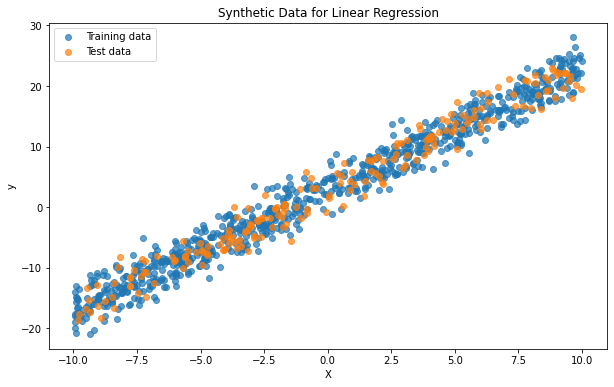

In [4]:
import matplotlib.pyplot as plt

# Plotting the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), label='Training data', alpha=0.7)
plt.scatter(X_test.numpy(), y_test.numpy(), label='Test data', alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.legend()
plt.grid(False)
plt.show()

3. Using the implemented linear regression class and the generated synthetic data, we can now train a linear regression model.

In [5]:
model = LinearRegressionClosedForm()
model.fit(X_train, y_train)

4. We can then evaluate the trained model on the test set and visualize the model performance by plotting the predicted and actual values.

Mean Squared Error: 3.9161662355822013


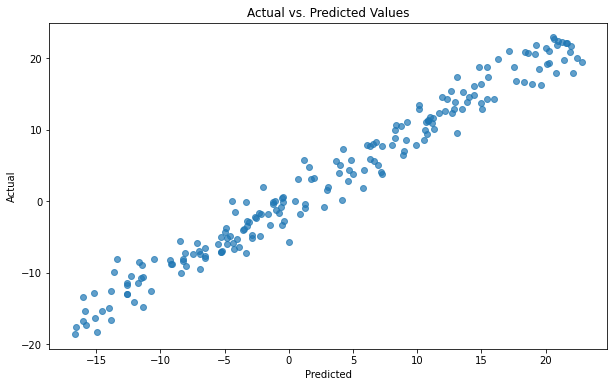

In [6]:
# Testing the model
y_pred = model.predict(X_test)

# # Evaluate the model
mse = model.evaluate(X_test, y_test, lambda y_pred, y_true: np.mean((y_pred - y_true)**2))
print("Mean Squared Error:", mse)

# Visualize predictions
model.visualize_predictions(X_test, y_test)